# Аналитика рынка недвижимости

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации. 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Загрузим данные из файла в датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# переименуем столбцы в соответствии со «змеиным_регистром»
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Описание данных
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **city_сenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

In [4]:
# Изучим общую информацию о полученном датафрейме
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


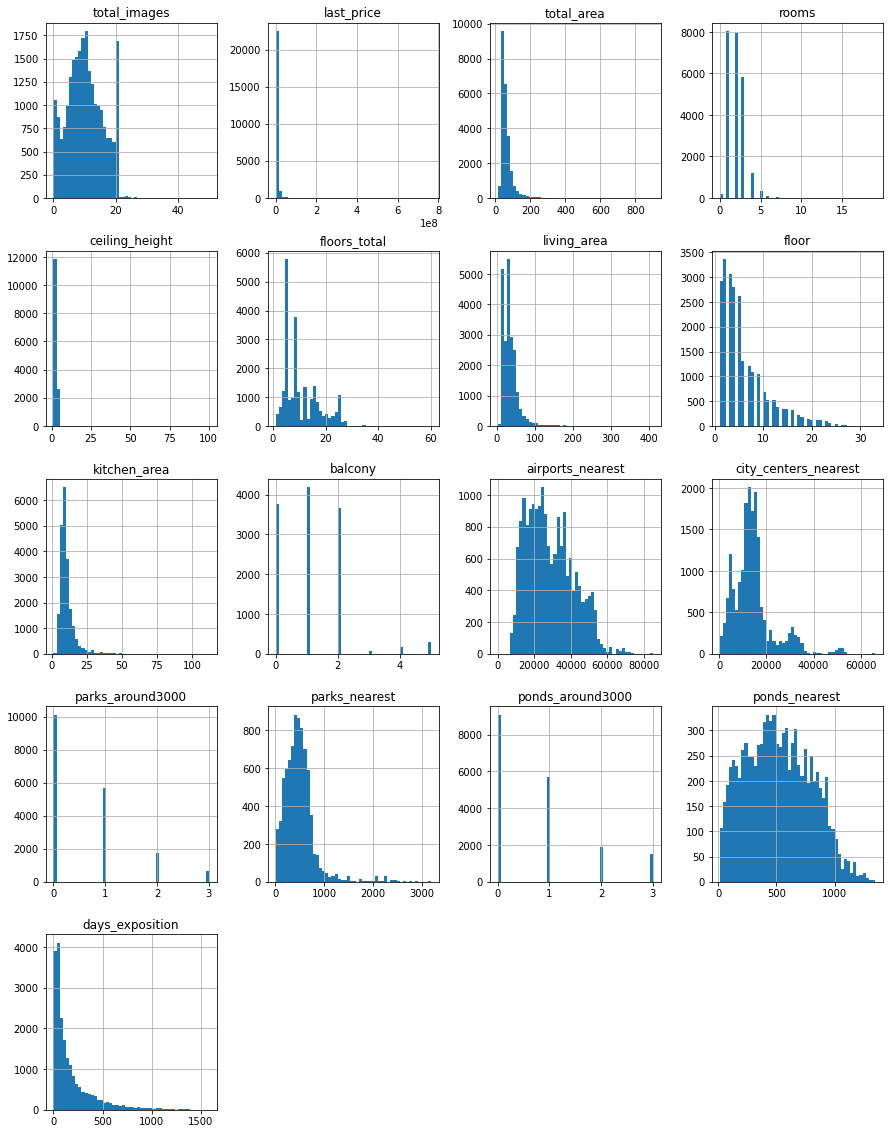

In [7]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(bins=50, figsize=(15, 20));

In [100]:
# Посмотрим на долю пропущенных значений в каждом столбце
(data.isna().sum()/len(data)*100).sort_values()

total_images             0.000000
balcony                  0.000000
kitchen_area             0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
living_area              0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
locality_name            0.206760
floors_total             0.362885
ceiling_height           0.548546
days_exposition         13.422507
parks_around3000        23.283683
ponds_around3000        23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ponds_nearest           61.559559
parks_nearest           65.909954
dtype: float64

<font color='#8A2BE2'>**Вывод:** 
    
- получен датафрейм из 22 столбцов и 23699 строк,
- явных дубликатов нет,
- есть пропуски в 14 столбцах из 22, неверные типы данных и странные значения:
  - **is_apartment** (object) - 88.3% пропусков, должен быть тип bool,
  - **ponds_nearest** - 61.5% пропусков,
  - **ponds_around3000** (float64) - 23.3% пропусков, должен быть тип int
  - **parks_nearest** - 65.9% пропусков,
  - **parks_around3000** (float64) - 23.3% пропусков, должен быть тип int
  - **balcony** (float64) - 48.6% пропусков, должен быть тип int
  - **ceiling_height** - 38.8% пропусков, странные значения высоты потолков в 1м и 100м,
  - **airports_nearest** - 23.4% пропусков, странное значение - расстояние 0м от квартиры до аэропорта,
  - **city_centers_nearest** - 23.3% пропусков,
  - **days_exposition** (float64) - 13.4% пропусков, должен быть тип int, странное максимальное значение в 1580 дней (больше 4 лет),
  - **kitchen_area** - 9.6% пропусков, странное минимальное значение 1.3м,
  - **living_area** - 8% пропусков, странное минимальное значение 2м,
  - **floors_total** (float64) - 0.36% пропусков, должен быть тип int,
  - **locality_name** - 0.2% пропусков,
  - **total_area** - странное максимальное значение в 900м²,
  - **last_price** - странное минимальное значение в 12000т.р.,
  - **first_day_exposition** (object) - должен быть тип datetime. </font> 

### Предобработка данных

 ####  Изучение и предобработка пропущенных значений

Пропуски в данных могут иметь взаимосвязь с датой публикации объявления, для удобства поисков зависимостей изменим формат данных во временной. Время публикации не будем принимать в расчет, для всех объявлений оно 00:00:00.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].min(), data['first_day_exposition'].max()

(Timestamp('2014-11-27 00:00:00'), Timestamp('2019-05-03 00:00:00'))

##### Пропуски в столбце locality_name — название населённого пункта

При размещении объявления на сервисе Яндекс.Недвижимость продавец выбирает адрес на карте или вводит вручную, в любом случае название населенного пункта вносится в объявление автоматически. Поэтому наиболее вероятная причина пропусков - технически проблемы, ошибки при выгрузке данных.

Возможно ли определить город по данным расстояния до центра:
 - объекты без указания населенного пункта находятся на разном расстоянии от центра,
 - кроме того не известно расстояние это до центра Санкт-Петербурга или центра населенного пункта, максимальное расстояние 41.294км - может быть и расстоянием от центра Санкт-Петербурга до квартиры находящейся на окраине Санкт-Петербурга (максимальная протяженность города около 90 км), так и расстоянием от другого населенного пункта до центра Санкт-Петербурга (минимальная протяженность города 52 км),
 - невозможно определить в каком направлении двигаться (на одном и том расстоянии от центра Питера множество населенных пунктов).
 
Не трогаем данные.

In [10]:
# расчет минимального и максимального расстояния до центра для объектов без указания города
city_centers = data[data['locality_name'].isna()]['city_centers_nearest']/1000
city_centers.min(), city_centers.max()

(1.322, 41.294)

##### Пропуски в столбце floors_total — всего этажей в доме

Возможная причина - самостоятельное заполнение данного поля на сервисе (не все пользователи заполнили это поле), закономерностей в данных пропусках не выявленно. Заполнять средним или медианой некорректно.

In [11]:
#причина пропусков в столбце (floors_total — всего этажей в доме) непонятна, закономерности нет
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


##### Пропуски в столбцах living_area — жилая площадь в квадратных метрах (м²) и  kitchen_area — площадь кухни в квадратных метрах (м²)

Все данные о площадях на сервисе заполняются вручную. Возможная причина пропусков - нежелание продавцов тратить время на расчет метража отдельно кухни, санузла, жилой площади.

Так же возмножно жилую площадь и площадь кухни не указывают для квартир студий (в них эти зоны обединены) или для апартаментов (нежилые помещения, которые по условиям близки к жилой недвижимости) проверка:

In [12]:
# Расчет процента количества студий, для которых не указана жилая площадь и плозадь кухни
print(data.query('studio == True')[['living_area', 'kitchen_area']].isna().sum() \
      /data[['living_area', 'kitchen_area']].isna().sum()*100)
print(data.query('is_apartment == True')[['living_area', 'kitchen_area']].isna().sum() \
      /data[['living_area', 'kitchen_area']].isna().sum()*100)

living_area     0.525486
kitchen_area    6.540825
dtype: float64
living_area     0.420389
kitchen_area    0.658472
dtype: float64


Пропуски в данных о жилой площади и площади кухни для студий и апартаментов составляют малую часть из всех пропусков по этим данным. Чаще для студий не указывают площадь кухни.

<font color='#8A2BE2'> Заполним пропуски соотношением средней жилой / кухонной площади к средней общей площади умноженным на общую площадь для конкретного объявления.<font />

In [13]:
data[['living_area', 'kitchen_area']].isna().sum()

living_area     1903
kitchen_area    2278
dtype: int64

In [14]:
data['living_area'].fillna(data['living_area'].mean()/data['total_area'].mean()*data['total_area'],\
                           inplace=True)
data['kitchen_area'].fillna(data['kitchen_area'].mean()/data['total_area'].mean()*data['total_area'],\
                            inplace=True)
data[['living_area', 'kitchen_area']].isna().sum()

living_area     0
kitchen_area    0
dtype: int64

##### Пропуски в столбце days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Доля пропусков - 13.4%. Минимальное значение в столбце - 1 день, возможно информации нет для объявлений закрытых день в день (ошибки в записи данных в таком случае), или же объявление не закрыто до сих пор (продавец заключил сделку на другом реурсе и забыл закрыть объявление на Яндекс.Недвижимость или квартира до сих пор не продана).


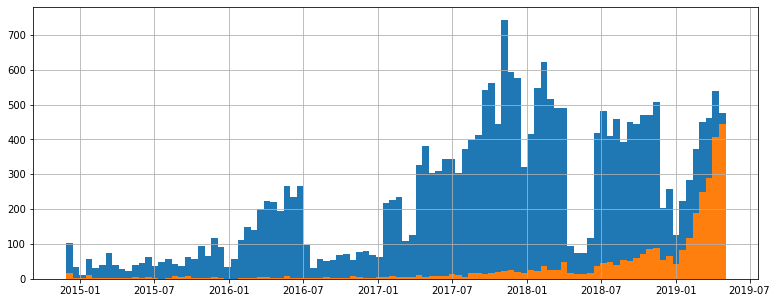

In [15]:
# изучим пропуски в количестве дней размещения объявления в зависимости от даты публикации
data['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['days_exposition'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5));

C 2018 года количество квартир с пропуском в продолжительности объявления возросло относительно предыдущих лет. Возможно данные были выгружены недавно относительно даты последней публикации (2019-05-03) и информация о заключении сделки по некоторым объектам оказалась недоступна. В идеале запросить обновленную информацию по этим данным, удалять не стоит - потеряем большую часть данных за 2019 год.

Информация о закрытии сделки отсутствует во все периоды  - скорее всего, это объявления, по которым продавцы забыли указать, что квартира больше не продается. Но заполнять данные медианным или средним значением - некорректно, есть возможность, что это квартиры с огромной стоимостью за квадрат или что-то очень неприглядное.

##### Пропуски в столбцах  parks_around3000 — число парков в радиусе 3 км и parks_nearest — расстояние до ближайшего парка (м)

Данные вносятся в систему автоматически (на данный момент на сервисе нет раздела для ручного указания ближайщих парков, водоемов, аэропортов и расстояния до центра). Возможно раньше данные по ближайшим объектам вносились вручную, необходимо проанализировать зависимость пропусков в данных от даты размещения объявления.


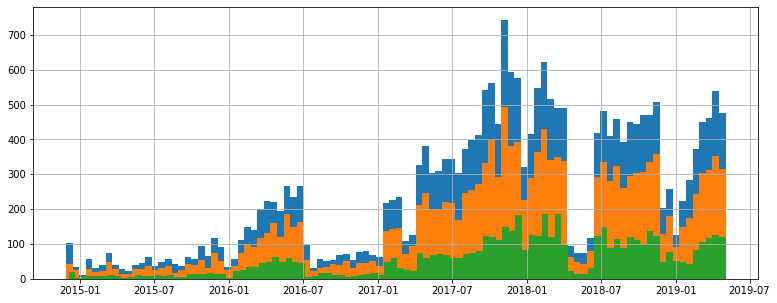

In [16]:
data['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['parks_nearest'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['parks_around3000'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5));

Пропуски в данных о расстоянии до парков (оранжевая гистограмма) и количество парков в радиусе 3км (зеленая гистограмма) не зависят от даты публикации (до 2017 года пропусков было меньше из-за меньшего количества объявлений на сервисе). Т.е. мы не можем утверждать, что это проблема ранних версий сервиса.

Интересно, что количество пропусков в данных о расстоянии до парка меньше, чем пропусков о наличии парков. Предположительно это происходит из-за суммирования пропусков и нулевых значений в parks_around3000 (для них пропуски в parks_nearest нормальны), проверим:

In [17]:
nearest_parks = data[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna())]['first_day_exposition'].count()/\
data[data['parks_nearest'].isna()]['first_day_exposition'].count()

if (data[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna())]['first_day_exposition'].count()+\
data[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna())]['first_day_exposition'].count()) == \
data[data['parks_nearest'].isna()]['first_day_exposition'].count():
    print(f'{nearest_parks:.2%} пропусков в parks_nearest обусловлено значениями NaN в parks_around3000')

35.33% пропусков в parks_nearest обусловлено значениями NaN в parks_around3000


In [18]:
print('Количество пропусков в parks_around3000:',\
      data.query('ponds_around3000.isna() and parks_around3000.isna()')['first_day_exposition'].count())
print('Количество пропусков в parks_around3000 имеющих указание локации:',\
      data.query('ponds_around3000.isna() and parks_around3000.isna()')['locality_name'].count())
data[data['parks_around3000'].isna()]['locality_name'].value_counts()

Количество пропусков в parks_around3000: 5518
Количество пропусков в parks_around3000 имеющих указание локации: 5510


посёлок Мурино            522
Всеволожск                398
Гатчина                   307
деревня Кудрово           299
Выборг                    237
                         ... 
деревня Хапо-Ое             1
посёлок Высокоключевой      1
поселок Цвылёво             1
посёлок Мыза-Ивановка       1
деревня Снегирёвка          1
Name: locality_name, Length: 344, dtype: int64

Наибольшее количество пропусков в  parks_around3000 в посёлке Мурино, что странно, потому что в этом мальньком населенном пункте есть несколько парков. Нужно сообщить об этой проблеме разработчикам. Заполнить пропуски нулем некорректно - не трогаем.

##### Пропуски в столбцах ponds_around3000 — число водоёмов в радиусе 3 км и  ponds_nearest — расстояние до ближайшего водоёма (м)

**Проведем аналогичное исследование для пропусков в ponds_around3000 — число водоёмов в радиусе 3 км и 
 ponds_nearest — расстояние до ближайшего водоёма (м)**

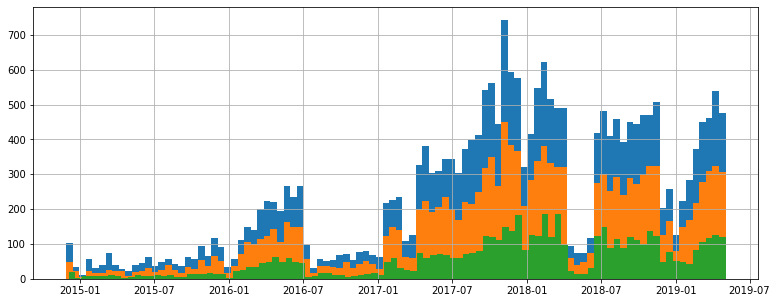

In [19]:
data['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['ponds_nearest'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['ponds_around3000'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5));

Пропуски в данных не зависят от даты публикации.

In [20]:
nearest_ponds = data[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna())]['first_day_exposition'].count()/\
data[data['ponds_nearest'].isna()]['first_day_exposition'].count()

if (data[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna())]['first_day_exposition'].count()+\
data[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna())]['first_day_exposition'].count()) == \
data[data['ponds_nearest'].isna()]['first_day_exposition'].count():
    print(f'{nearest_ponds:.2%} пропусков в parks_nearest обусловлено значениями NaN в parks_around3000')

37.82% пропусков в parks_nearest обусловлено значениями NaN в parks_around3000


In [21]:
print('Количество пропусков в ponds_around3000 и parks_around3000:',\
      data.query('ponds_around3000.isna() and parks_around3000.isna()')['first_day_exposition'].count())
print('Количество пропусков в ponds_around3000 и parks_around3000 имеющих указание локации:',\
      data.query('ponds_around3000.isna() and parks_around3000.isna()')['locality_name'].count())
data.query('ponds_around3000.isna() and parks_around3000.isna()')['locality_name'].value_counts()

Количество пропусков в ponds_around3000 и parks_around3000: 5518
Количество пропусков в ponds_around3000 и parks_around3000 имеющих указание локации: 5510


посёлок Мурино            522
Всеволожск                398
Гатчина                   307
деревня Кудрово           299
Выборг                    237
                         ... 
деревня Хапо-Ое             1
посёлок Высокоключевой      1
поселок Цвылёво             1
посёлок Мыза-Ивановка       1
деревня Снегирёвка          1
Name: locality_name, Length: 344, dtype: int64

In [22]:
data.query('locality_name == "деревня Кудрово"')['first_day_exposition'].count()

299

Значения ponds_around3000 и parks_around3000 имеют связь - пропуски в одних и тех же населенных пунктах, причем пропуски есть во всех публикациях данных населенных пунктов. Нужно сообщить разработчикам.

##### Пропуски в столбцах city_сenters_nearest — расстояние до центра города (м) и airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

In [23]:
print('Количество пропусков в city_centers_nearest:',\
      data.query('city_centers_nearest.isna()')['first_day_exposition'].count())
print('Количество пропусков в city_centers_nearest имеющих указание локации:',\
      data.query('city_centers_nearest.isna()')['locality_name'].count())
data.query('city_centers_nearest.isna()')['locality_name'].value_counts()

Количество пропусков в city_centers_nearest: 5519
Количество пропусков в city_centers_nearest имеющих указание локации: 5511


посёлок Мурино            522
Всеволожск                398
Гатчина                   307
деревня Кудрово           299
Выборг                    237
                         ... 
деревня Хапо-Ое             1
посёлок Высокоключевой      1
поселок Цвылёво             1
посёлок Мыза-Ивановка       1
деревня Снегирёвка          1
Name: locality_name, Length: 345, dtype: int64

In [24]:
print('Количество пропусков в airports_nearest:',\
      data.query('airports_nearest.isna()')['first_day_exposition'].count())
print('Количество пропусков в airports_nearest имеющих указание локации:',\
      data.query('airports_nearest.isna()')['locality_name'].count())
data.query('airports_nearest.isna()')['locality_name'].value_counts()

Количество пропусков в airports_nearest: 5542
Количество пропусков в airports_nearest имеющих указание локации: 5534


посёлок Мурино            522
Всеволожск                398
Гатчина                   307
деревня Кудрово           299
Выборг                    237
                         ... 
деревня Хапо-Ое             1
посёлок Высокоключевой      1
поселок Цвылёво             1
посёлок Мыза-Ивановка       1
деревня Снегирёвка          1
Name: locality_name, Length: 344, dtype: int64

Ситуация очень похожа на пропуски в данных о парках и прудах, больше всего пропусков в тех же населенных пунктах, в том же количестве объявлений, похоже в данных столбцах некоторые населенные пункты вызывают сбои.

##### Пропуски в столбце ceiling_height — высота потолков (м)

Данные вносятся вручную, продавцы могут не знать высоту потолков - поэтому данные не указаны. Процент пропусков высокий - 38%, необходимо обработать пропуски. Высота потолков может зависеть от населенного пункта, района населенного пункта, года застройки, застройщика, типа планировки. Нам известны данные только о локации, заполним пропуски медианным значением по населенном пункту после унификации названий населенных пунктов.

In [25]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

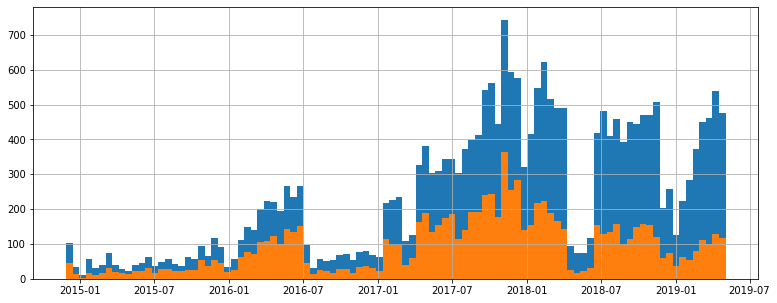

In [26]:
data['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['ceiling_height'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5));

Данные о высоте потолков  - связи с датой публикации нет.

##### Пропуски в столбце balcony — число балконов

Данные вносятся вручную, продавцы,  в квартирах которых имеется балкон, вряд ли оставят это поле пустым, поэтому пропуски в данном столбце заполним значением 0.

In [27]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

 ##### Пропуски в столбце is_apartment — апартаменты

Параметр вводимый продавцом вручную


In [28]:
# расчет процента объяявлений с указанием, что продаваемый объект не апартаменты
(data.query('is_apartment == False')['first_day_exposition'].count())/data.shape[0]*100

11.49837545888012

Всего 11% объявлений содержат пометку, что это не апартаменты. Посмотрим как распределяется количество пропусков и заполненых значений относительно общего количества объявлений.

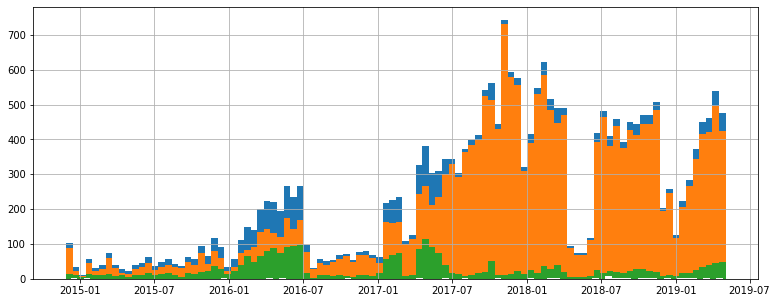

In [29]:
data['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data[data['is_apartment'].isna()]['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data.query('is_apartment == False')['first_day_exposition'].hist(bins=100, figsize=(13, 5))
data.query('is_apartment == True')['first_day_exposition'].hist(bins=100, figsize=(13, 5), color='white');

Количество пропусков в графе апартаменты (оранжевая гистограмма) относительно равномерно распределено относительно общего количества объявлений (синяя гистограмма). В первых полугодиях 2016 и 2017 годов количество пропусков относительного общего количества объявлений меньше из-за увеличения количества отметок "не апартаменты" (зеленая гистограмма). 

Предположение - люди, продающие квартиры из жилого фонда, не осведомлены о том, что такое апартаменты, поэтому не заполняют данную графу. Заполним пропуски значением False.

In [30]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [31]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [32]:
(data.isna().sum()/len(data)*100).sort_values()

total_images             0.000000
balcony                  0.000000
kitchen_area             0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
living_area              0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
locality_name            0.206760
floors_total             0.362885
days_exposition         13.422507
parks_around3000        23.283683
ponds_around3000        23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
ponds_nearest           61.559559
parks_nearest           65.909954
dtype: float64

#### Изменение типов данных в каждом столбце

Приводим к целочисленным значениям int:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - доли метра не важны в данном показателе
* balcony — число балконов - всегда целое число
* city_сenters_nearest — расстояние до центра города (м) - доли метра не важны в данном показателе
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* floors_total — всего этажей в доме - всегда целое число
* last_price — цена на момент снятия с публикации - обычно цена за квартиры круглое число (рубли, копейки не считают)
* parks_around3000 — число парков в радиусе 3 км - всегда целое число
* parks_nearest — расстояние до ближайшего парка (м) - доли метра не важны в данном показателе
* ponds_around3000 — число водоёмов в радиусе 3 км - всегда целое число
* ponds_nearest — расстояние до ближайшего водоёма (м) - доли метра не важны в данном показателе


Округляем до двух знаков после запятой (достаточно для площадей):
* ceiling_height — высота потолков (м)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* living_area — жилая площадь в квадратных метрах (м²)
* total_area — общая площадь квартиры в квадратных метрах (м²)

Без изменений:
* first_day_exposition — дата публикации - изменено ранее
* is_apartment — апартаменты (булев тип) 
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* studio — квартира-студия (булев тип)
* floor — этаж - уже целое число
* rooms — число комнат - уже целое число
* total_images — число фотографий квартиры в объявлении - уже целое число

In [33]:
column_int = ['airports_nearest', 'balcony', 'city_centers_nearest', 'days_exposition', 'floors_total',\
       'last_price', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column in column_int:
    data[column] = (data[data[column].notna()][column].astype('int'))

In [34]:
round = ['ceiling_height', 'kitchen_area', 'living_area', 'total_area']

for column in round:
    data[column] = data[data[column].notna()][column].round(2)

In [35]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,90.79,9,False,False,False,27.85,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Не во всех столбцах получилось изменить данные (если есть пропуск, то значения не приводятся к int).

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Изучение уникальных значений в столбце с названиями и устранение неявных дубликатов

In [37]:
print('Количество уникальных значений в locality_name', data['locality_name'].nunique())
data['locality_name'].unique()

Количество уникальных значений в locality_name 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Унифицируем названия населенных пунктов - удалим "приставки" в названиях (коттеджный посёлок, поселок, посёлок и др.)

In [38]:
name_to_remove = ['садоводческое некоммерческое товарищество', 'садовое товарищество', 'поселок городского типа',\
                  'городской посёлок', 'городской поселок', 'посёлок городского типа', 'коттеджный поселок',\
                  'посёлок при железнодорожной станции','поселок городского типа', 'поселок станции',\
                  'посёлок станции', 'коттеджный посёлок', 'поселок', 'посёлок', 'деревня', 'село']
# методом replace заменим все элементы из name_to_remove в названиях населенных пунктов на '', 
# методом strip удалим пробелы вначале строки
for name in name_to_remove:
    data['locality_name'] = data['locality_name'].str.replace(name, '').str.strip()

In [39]:
print(data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

305


array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильи

Количество уникальных значений в locality_name уменьшилось с 364 значений до 305.

##### Устранение пропусков в столбце ceiling_height

**Вернемся к высоте потолков - заполним пропуски.**

In [40]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == name), 'ceiling_height'].median()

print('Доля оставшихся пропусков: {0:.2%}'.format((data['ceiling_height'].isna().sum())/data.shape[0]))

Доля оставшихся пропусков: 0.55%


Пропуски обусловлены невозможностью расчитать значения для данных с отсутствующей локацией, но доля пропусков стала значительно меньше.

Для столбцов living_area / kithen_area можно найти соотношение средней жилой / кухонной площади к средней общей площади и использовать полученное значение для замены пропусков

#### Поиск и устранение редких и выбивающихся значений

##### Анализ значений

Проанализируем значения, которые могут быть подозрительными: 

In [41]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'city_centers_nearest', 'airports_nearest']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,city_centers_nearest,airports_nearest
count,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23569.000000,18180.000000,18157.000000
mean,60.348651,34.594071,10.506279,6.541549e+06,2.070636,2.732473,14191.277833,28793.672193
std,35.654083,22.354673,6.040009,1.088701e+07,1.078405,1.004391,8608.386210,12630.880622
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,181.000000,0.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.550000,9238.000000,18585.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.700000,13098.500000,26726.000000
75%,69.900000,42.100000,12.000000,6.800000e+06,3.000000,2.700000,16293.000000,37273.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,100.000000,65968.000000,84869.000000


###### Диаграммы размаха

Постоим диаграммы размаха для визуализации выбросов и гистограммы для определения частоты встречаемости признака.
Высоту потолков и стоимость рассмотрим отдельно.

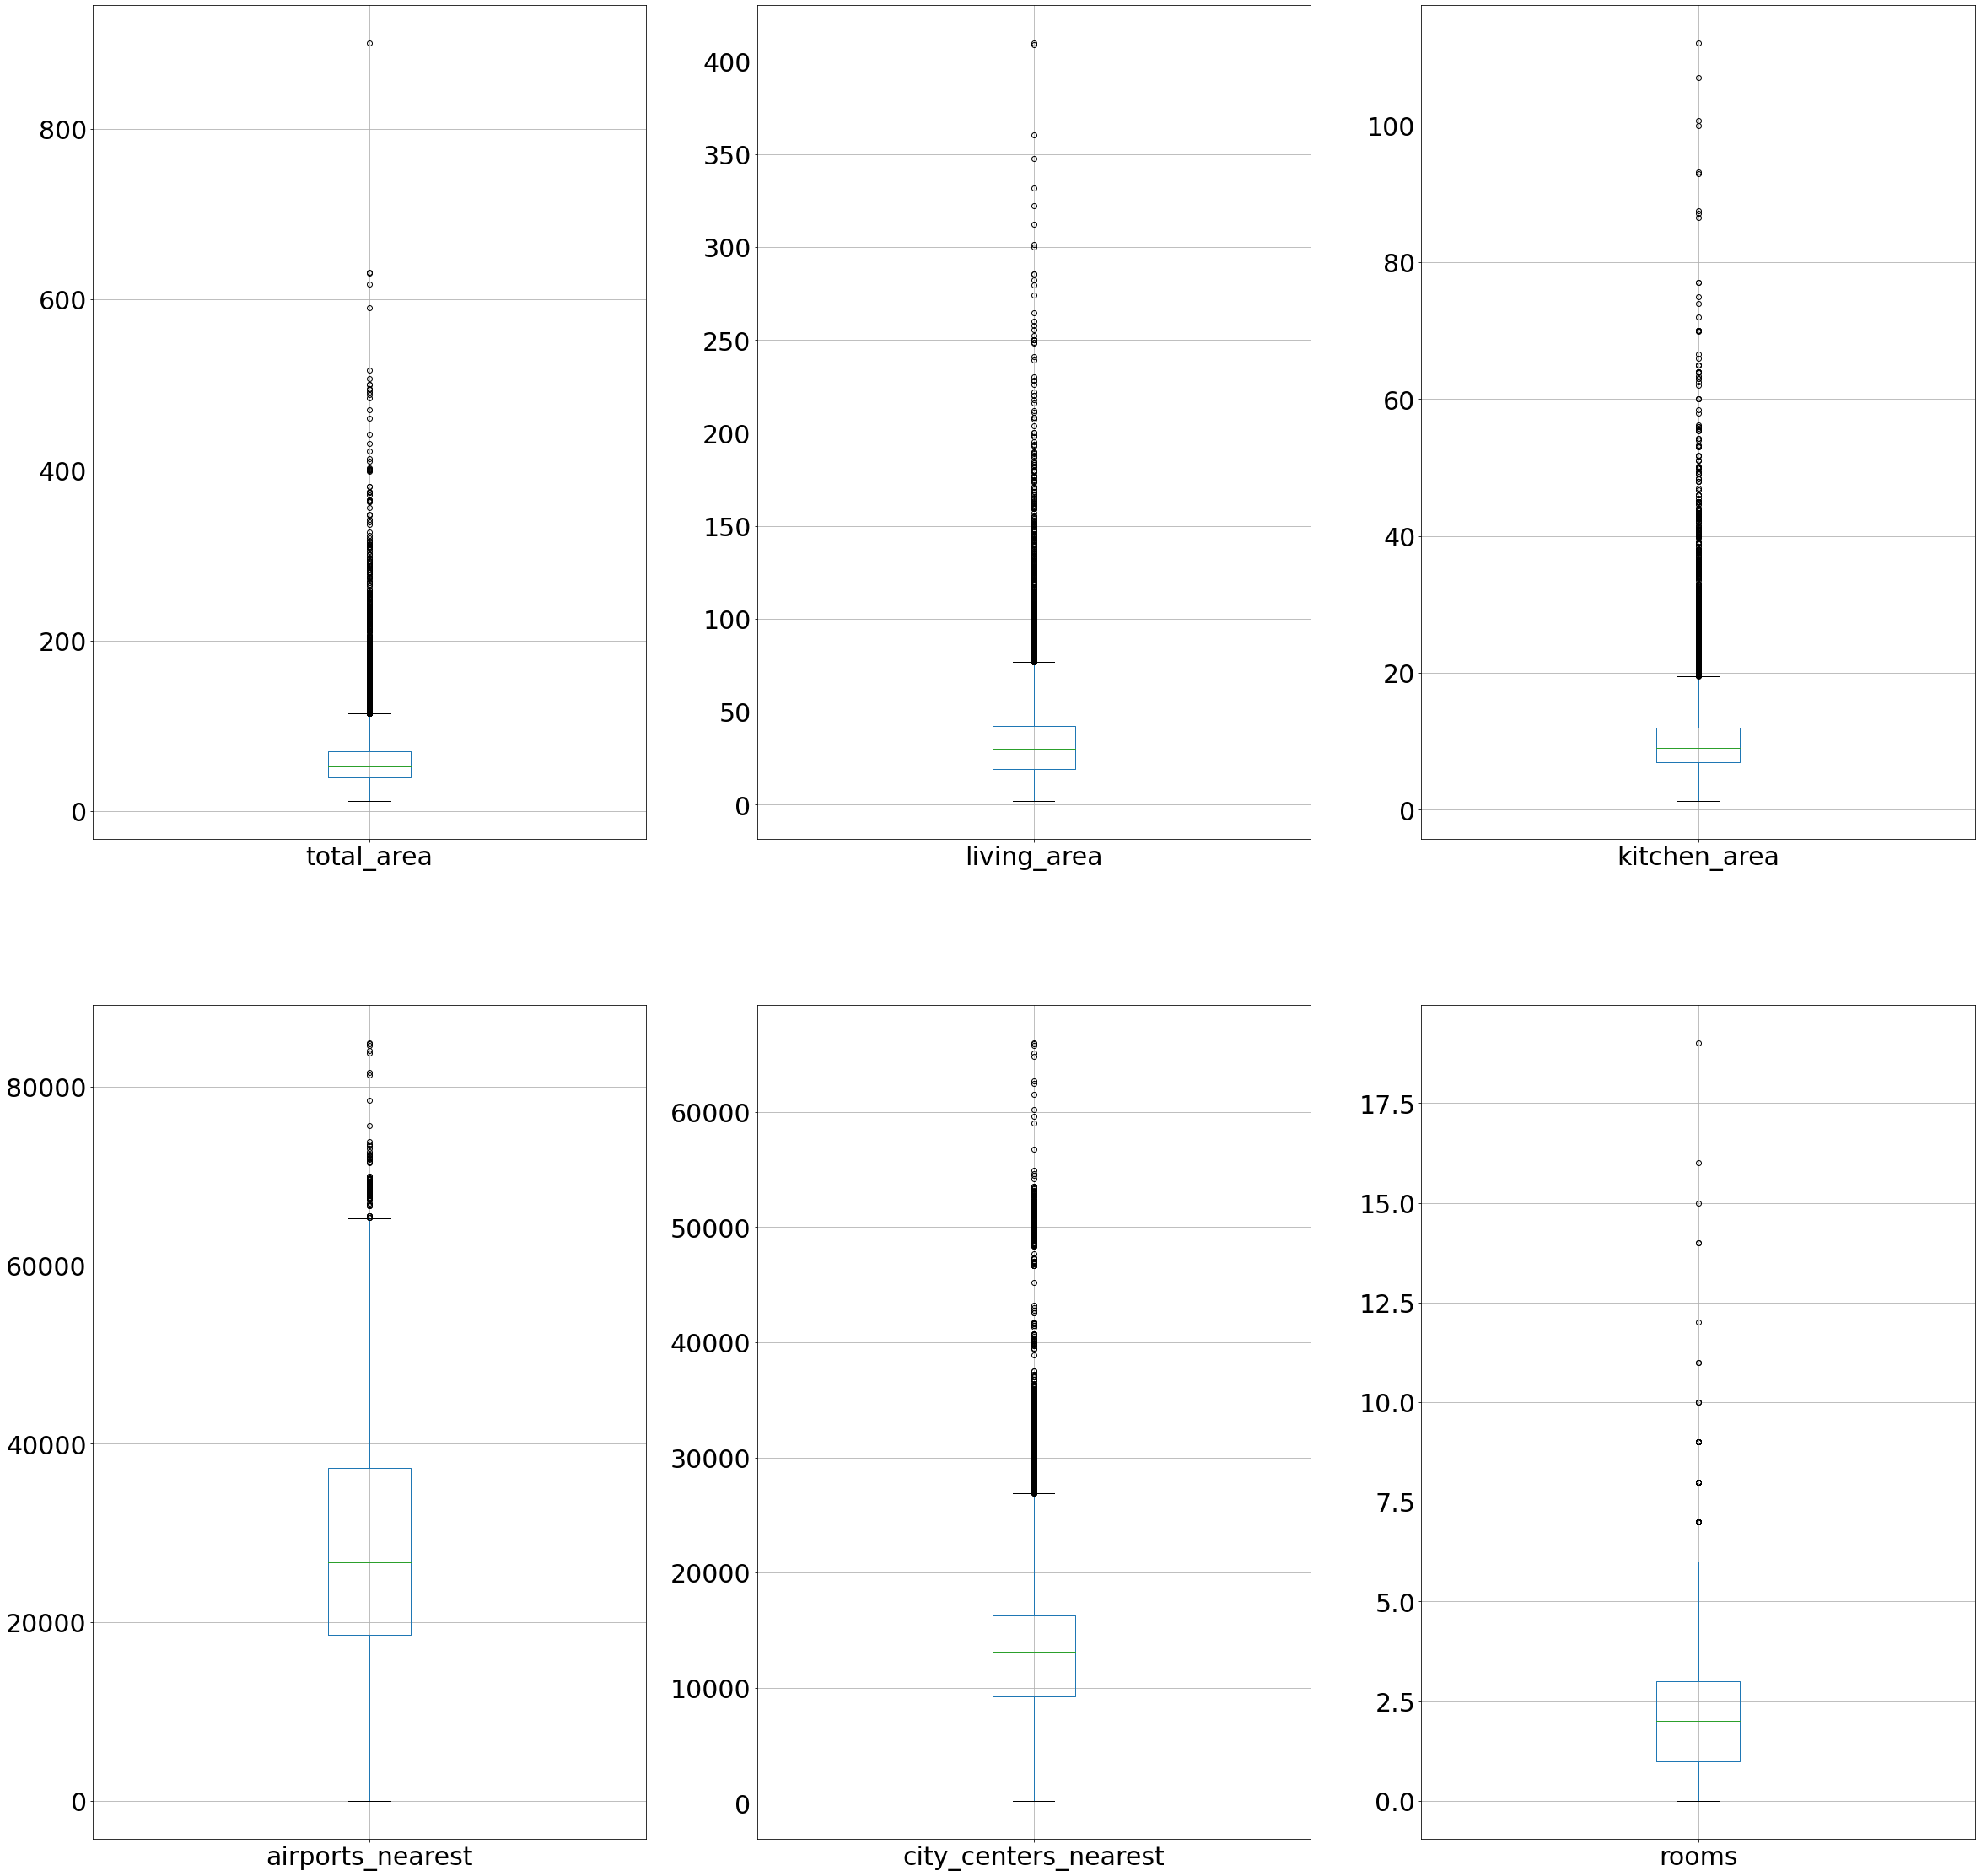

In [42]:
rows = 2 # количество строк диаграмм размаха
cols = 3 # количество стоблцов диаграмм размаха
f, axs = plt.subplots(rows, cols, figsize=(40, 40)) # subplots для построения нескольких диаграмм размаха в сетке
# f - инициализация области для рисунка, axs - оси, на которых будут отображаться данные
# список столбцов, по которым хотим получить диаграммы размаха
column_list = ['total_area', 'living_area', 'kitchen_area', 'airports_nearest', 'city_centers_nearest', 'rooms']
count = 0 # счетчик для продвижения по списку столбцов
for r in range(rows): # строка в сетке диаграмм
    for c in range(cols): # столбец в сетке диаграмм
        ax = data.boxplot(column=column_list[count], ax=axs[r,c], fontsize=30) # ax - координаты диаграммы в сетке
        count += 1

###### Гистограммы

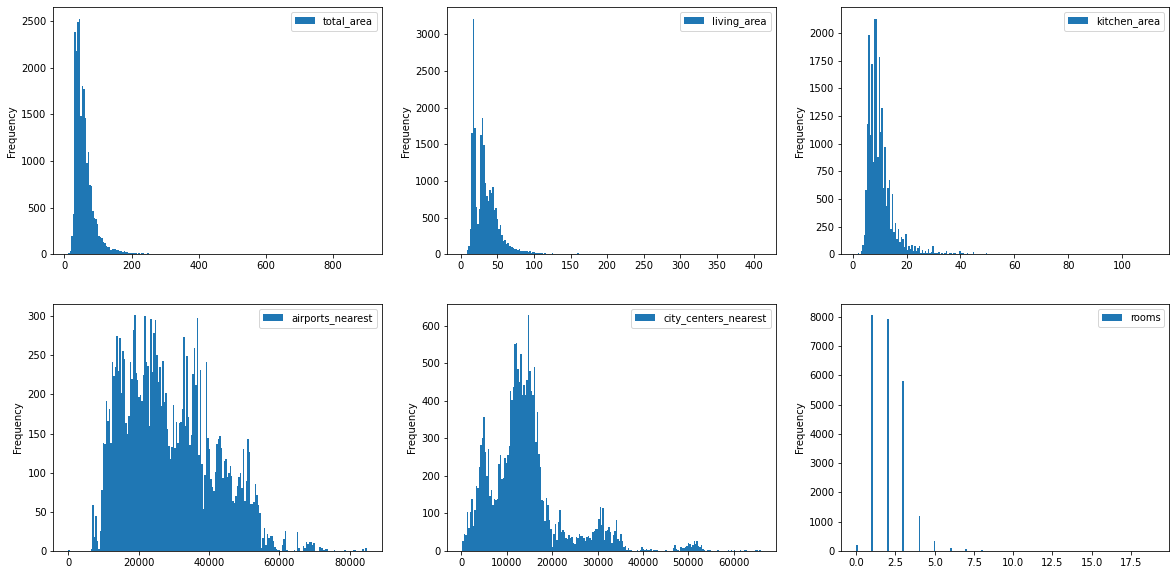

In [43]:
rows = 2 
cols = 3 
f, axs = plt.subplots(rows, cols, figsize=(20, 10)) 
column_list = ['total_area', 'living_area', 'kitchen_area', 'airports_nearest', 'city_centers_nearest', 'rooms']
count = 0 
for r in range(rows): 
    for c in range(cols): 
        ax = data.plot(y=column_list[count], kind='hist', ax=axs[r,c], bins=200, fontsize=10) 
        count += 1

###### Выводы по значениям total_area, kitchen_area, living_area, airports_nearest, rooms, city_centers_nearest

**total_area — общая площадь квартиры в квадратных метрах (м²)** 
- медианное значение 52м², среднее значение 60.3м², минимальное - 12м², максимальное 900м²,
- на диаграмме размаха, видно, что значение площади больше 300м² - единичны, на гистограмме - значения больше 200м² почти не встречаются, пик приходится на значения 60м²,
- большая часть квартир имеет площадь 40-70м².
- **Решение:** на 2019 год - [самая большая квартира в Питере - 539м²](https://lenta.ru/news/2019/08/15/spb/), ограничим данные значением в 600м² (с запасом - вдруг какие-нибудь квартиры больше 539м² не смогли найти)


**kitchen_area — площадь кухни в квадратных метрах (м²) и living_area — жилая площадь в квадратных метрах (м²)** 
- <font color='#8A2BE2'> медианные значения - 9 и 30м², средние значения - 10.5 и 34.5м²,  минимальные - 1.3 и 2м², максимальные 112 и 409м² (для больших квартир вполне возможно), <font/>
- <font color='#8A2BE2'> большая часть квартир имеет площадь кухни и жилой зоны 7-12м² и 19-42м², <font/>
- смущают минимальные значения с жилой зоной в 2м² и кухней в 1м², по СП 54.13330.2022: минимум 14 м² общей жилой площади в однокомнатной квартире
- **Решение:** минимальные данные подозрительны, но возможно продавцы не знали и не желали измерять эти площади и поставили произвольные значения, не будем трогать.


**airports_nearest — расстояние до ближайшего аэропорта в метрах (м)** 
- медианное значение 26726м, среднее значение 28793.6м, минимальное - 0м, максимальное 84869м,
- на диаграмме размаха, видно, что значение площади больше 37273м - единичны, но вполне реальны: протяженность Ленинградской области запада на восток - 440 км, с севера на юг - 325 км,
- минимальное значение 0м - подозрительно, так как в радиусе 3 км от аэропорта строить дома нельзя.
- **Решение:** избавимся от данных с расстоянием до аэропорта менее 3000м.

**rooms — число комнат**
- больше всего квартир с 1, 2 или 3 комнатами,
- на диаграмме размаха, видно, что квартиры в которых больше 6 комнат - единичны.
- **Решение:** избавимся от данных количеством комнат больше 6.

**city_centers_nearest — расстояние до центра города (м)** 
- медианное значение 13098м, среднее значение 14191м, минимальное - 181м, максимальное 65968м,
- на диаграмме размаха, видно, что значение площади больше 50000м - единичны, но вполне реальны: протяженность Ленинградской области запада на восток - 440 км, с севера на юг - 325 км.
- **Решение:** оставляем как есть.


###### Изучение данных в столбце ceiling_height

**Рассмотрим подробнее данные в столбце ceiling_height — высота потолков (м)** 


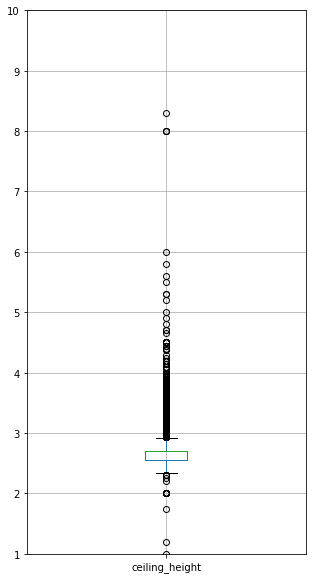

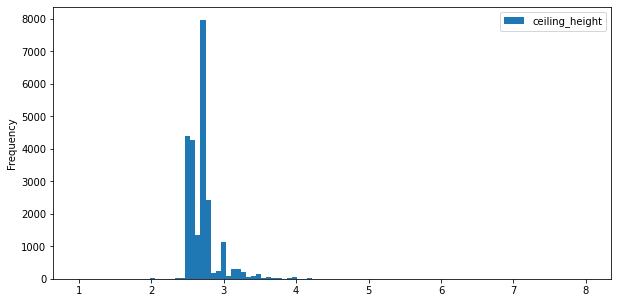

In [45]:
data.boxplot('ceiling_height', figsize=(5, 10))
plt.ylim(1, 10)
data.plot(y='ceiling_height', kind='hist', bins=100, range=(1, 8), figsize=(10, 5));

**ceiling_height — высота потолков (м)** 
- медианное значение 2.65м, среднее значение 2.7м, минимальное - 1м, максимальное 100м,
- в России продаются двухуровневые квартиры с высотой потолков 10,3 метра, минимальной нормой в России считается высота потолка 2,4 метра,
- скорее всего в данных высота потолков ≥ 24м - это значения введенные в неверном формате (см вместо м).
- **Решение:** избавимся от данных, высота потолков для которых < 2,4м и от значений >10,3м, но <24м, значения ≥ 24 переведем из см в м.

###### Изучение данных в столбце last_price

**Рассмотрим подробнее данные в столбце last_price — цена на момент снятия с публикации** 


In [46]:
# переведем стоимость в миллионы
data['last_price'] = (data['last_price']/1000000).round(3)
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

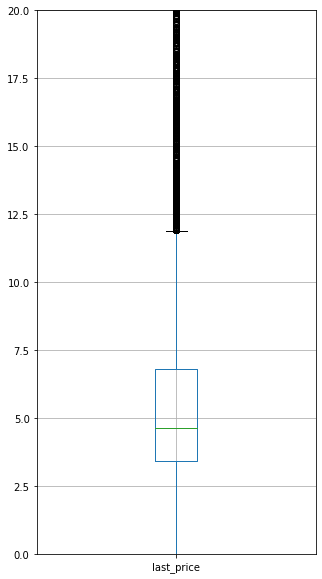

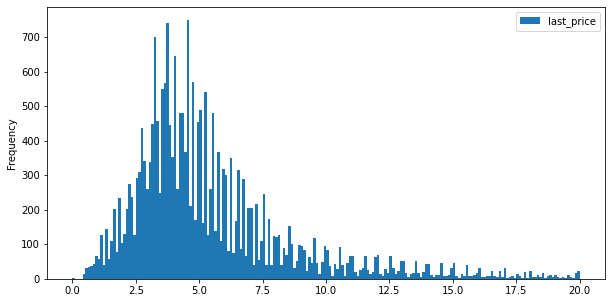

In [47]:
data.boxplot('last_price', figsize=(5, 10))
plt.ylim(0, 20)
data.plot(y='last_price', kind='hist', bins=200, range=(0, 20), figsize=(10, 5)); 

In [48]:
data['last_price'].sort_values().head(10)

8793     0.012
17456    0.430
14911    0.430
16274    0.440
17676    0.450
16219    0.450
9581     0.450
5698     0.450
21912    0.470
18867    0.470
Name: last_price, dtype: float64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23569 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**last_price — цена на момент снятия с публикации** 
- медианное значение 4.6млн, среднее значение 6.5млн, минимальное - 0.012млн, есть и квартиры стоимостью до полумиллиона, максимальное 763млн, квартир стоимостью выше 20 миллионов - мало.
- Минимальные и максимальные цены - подозрительные:
    - или стоимость указана неверно - изначально не в рублях, а в миллионах или сотнях тысяч,
    - или для дешевых квартир - локация - полузаброшенные населеные пункты и плохими жилищными условиями, для дорогих - огромная квадратура и всё в золоте.
- Посмотрим на распределение после устранения выбросов по другим значениям.

##### Устранение выбросов

**Ликвидируем выбросы, обновленные данные будем вносить в новую таблицу good_data:**

In [50]:
# значения ≥ 24 переведем из см в м
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = \
    data.loc[data['ceiling_height'] >= 24, 'ceiling_height']/10

In [51]:
# рассчитаем доли значений, которые хотим отбросить
print('Доля значений площадью больше 600м²: {0:.2%}'.format(data.query('total_area >= 600')\
                                                            .shape[0]/data.shape[0]))
print('Доля значений с расстоянием до аэропорта менее 3000м: {0:.3%}'.\
      format(data.query('airports_nearest < 3000').shape[0]/data.shape[0]))
print('Доля значений с количеством комнат больше 6: {0:.2%}'.format(data.query('rooms > 6')\
                                                                    .shape[0]/data.shape[0]))
print('Доля значений высота потолков для которых < 2,4м и >10,3м: {0:.2%}'.\
      format(data.query('ceiling_height < 2.4 or ceiling_height > 10.3').shape[0]/data.shape[0]))

Доля значений площадью больше 600м²: 0.02%
Доля значений с расстоянием до аэропорта менее 3000м: 0.004%
Доля значений с количеством комнат больше 6: 0.38%
Доля значений высота потолков для которых < 2,4м и >10,3м: 0.10%


<font color='#8A2BE2'>От данных значений можем спокойно избавиться, их доля мала.<font />

In [52]:
#избавимся от данных с площадью больше 600м², с расстоянием до аэропорта менее 3000м,
#количеством комнат больше 6
good_data = data.query('((airports_nearest > 3000 or airports_nearest.isna())\
   and total_area <= 600 and rooms < 6)').copy()

In [53]:
# избавимся от данных, высота потолков для которых < 2,4м и от значений >10,3м, но <24м, 
good_data = good_data.query('10.3 >= ceiling_height >= 2.4').copy()
good_data['ceiling_height'].describe()

count    23349.000000
mean         2.702385
std          0.240666
min          2.400000
25%          2.550000
50%          2.700000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

**Посмотрим распределение данных по стоимости после очистки данных:**

count    23349.000000
mean         6.278587
std          8.171609
min          0.012000
25%          3.430000
50%          4.600000
75%          6.700000
max        401.300000
Name: last_price, dtype: float64

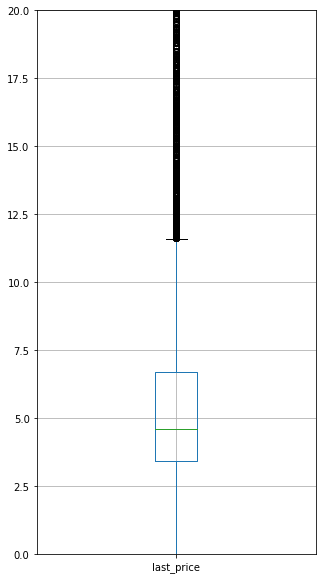

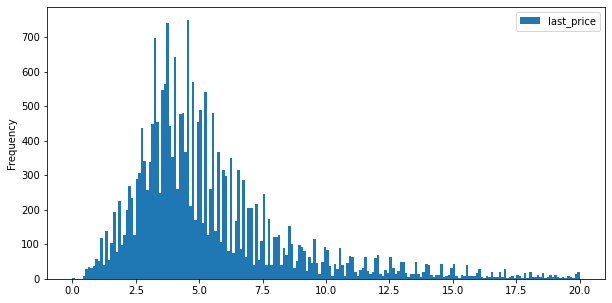

In [54]:
good_data.boxplot('last_price', figsize=(5, 10))
plt.ylim(0, 20)
good_data.plot(y='last_price', kind='hist', bins=200, range=(0, 20), figsize=(10, 5))
good_data['last_price'].describe()

<font color='#8A2BE2'>Аномально дешевых квартир меньше не стало. Посмотрим на квартиры до полумиллиона (очень уж дешевые):<font/>

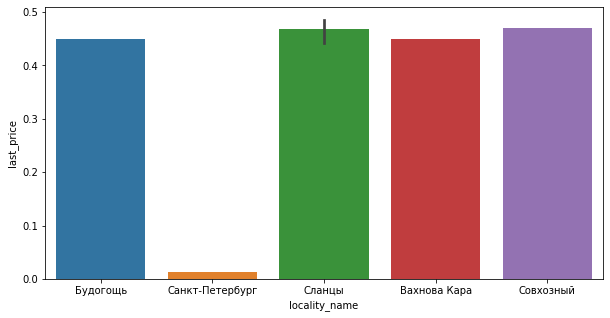

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(x='locality_name', y='last_price', data=good_data.query('last_price < 0.5'));

<font color='#8A2BE2'>В Будогоще, Сланцах, Вахновой Каре и Совхозном и сейчас есть дешевые квартиры, а вот Питер до 100тысяч - странно:<font />

In [56]:
good_data.query('locality_name == "Санкт-Петербург" and last_price < 0.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,0.012,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


109м² за 12.000Р в Питере купили за 8 дней - или кому-то очень повезло, или продавец допустил ошибку в цене, или квартира не продавалась, а сдавалась посуточно, но не в том разделе. Удалим.

In [57]:
good_data = good_data.query('last_price != last_price.min()').copy()
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23348.000000,23348.000000,23348.000000,23348.000000,23348.000000,23264.000000,23348.000000,23348.000000,23348.000000,23348.000000,17923.000000,17945.000000,17946.000000,7933.000000,17946.000000,8960.000000,20253.000000
mean,9.860245,6.278855,58.916457,2.030709,2.702383,10.741833,33.642522,5.919565,10.397987,0.594612,28840.389332,14275.093787,0.605093,492.190218,0.765686,519.611049,180.466104
std,5.674458,8.171681,30.252305,0.974709,0.240671,6.598708,18.934340,4.893980,5.768249,0.961636,12674.400241,8588.364444,0.796142,344.015534,0.935648,277.737252,219.520709
min,0.000000,0.430000,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.430000,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18522.000000,9425.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26871.000000,13149.000000,0.000000,456.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,37406.500000,16318.000000,1.000000,614.000000,1.000000,732.250000,231.000000
max,50.000000,401.300000,507.000000,5.000000,10.300000,60.000000,301.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<font color='#8A2BE2'>Посмотрим какая доля данных осталась после очистки:<font/>

In [58]:
print('Доля очищенных данных от начальной величины составляет: {0:.4%}'.format(good_data.shape[0]/data.shape[0]))

Доля очищенных данных от начальной величины составляет: 98.5189%


### Новые столбцы в таблице

#### Цена одного квадратного метра

In [59]:
# расчитаем цену за квадратный метр в тясячах рублей
good_data['price_square_m'] = (good_data['last_price']*1000)/good_data['total_area']
good_data['price_square_m'].round(0)
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370
1,7,3.350,40.4,2018-12-04,1,2.63,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792
2,10,5.196,56.0,2015-08-20,2,2.70,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714
3,0,64.900,159.0,2015-07-24,3,2.70,14.0,90.79,9,False,False,False,27.85,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000


#### День недели, месяц, год публикации объявления

In [60]:
good_data['weekday'] = good_data['first_day_exposition'].dt.weekday
good_data['month'] = good_data['first_day_exposition'].dt.month
good_data['year'] = good_data['first_day_exposition'].dt.year
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m,weekday,month,year
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,3,2019
1,7,3.350,40.4,2018-12-04,1,2.63,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,12,2018
2,10,5.196,56.0,2015-08-20,2,2.70,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,8,2015
3,0,64.900,159.0,2015-07-24,3,2.70,14.0,90.79,9,False,False,False,27.85,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018


#### Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [61]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
good_data['floor_type'] = good_data.apply(floor_type, axis=1)

good_data['floor_type'].value_counts()

другой       17245
последний     3245
первый        2858
Name: floor_type, dtype: int64

#### Расстояние до центра города в километрах

In [62]:
good_data['city_сenters_nearest_km'] = (good_data['city_centers_nearest']/1000).round(0)
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m,weekday,month,year,floor_type,city_сenters_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.63,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.70,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,8,2015,другой,14.0
3,0,64.900,159.0,2015-07-24,3,2.70,14.0,90.79,9,False,False,False,27.85,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018,другой,8.0


### Исследовательский анализ данных

#### Изучение параметров объектов

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

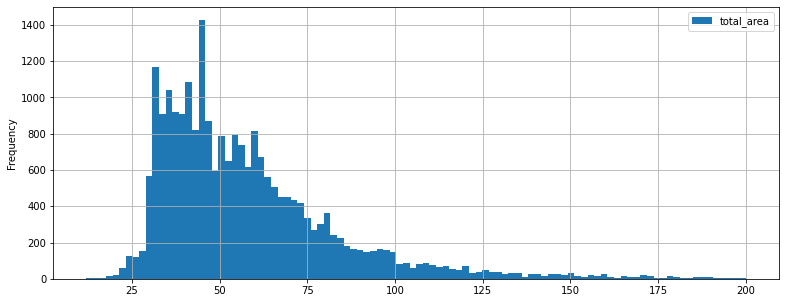

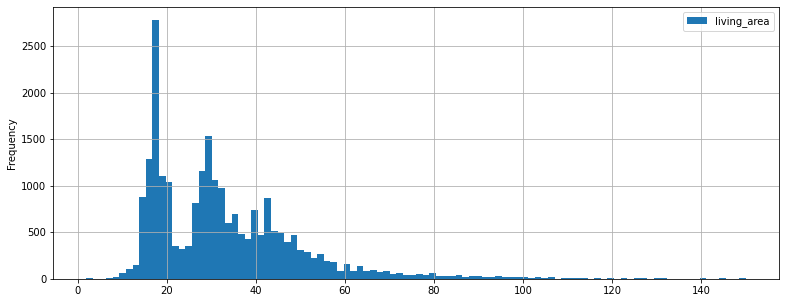

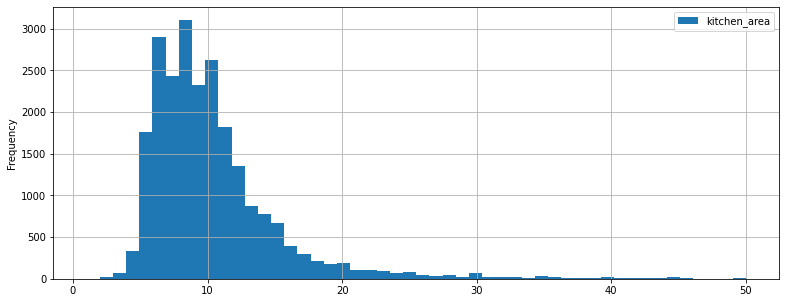

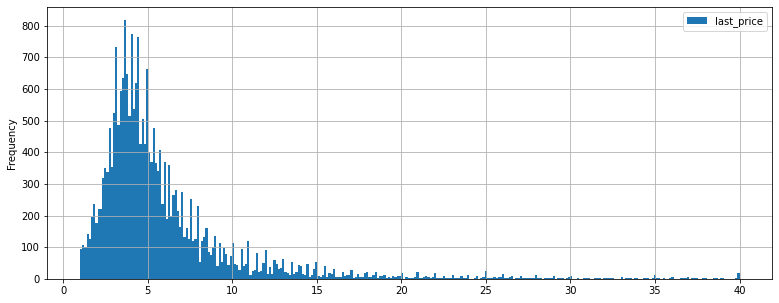

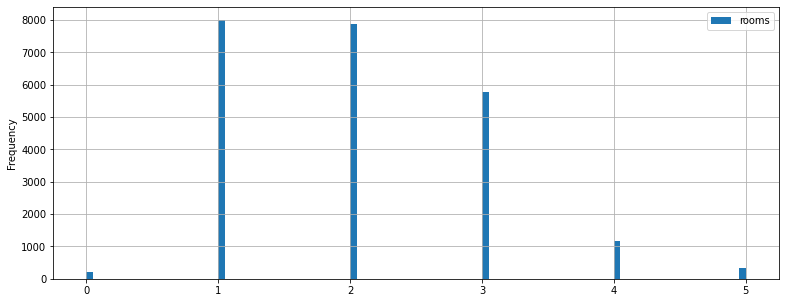

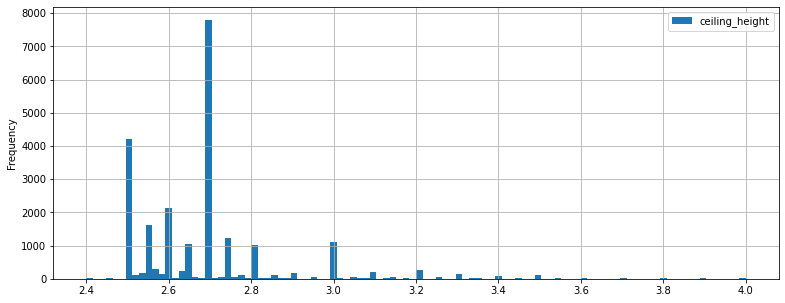

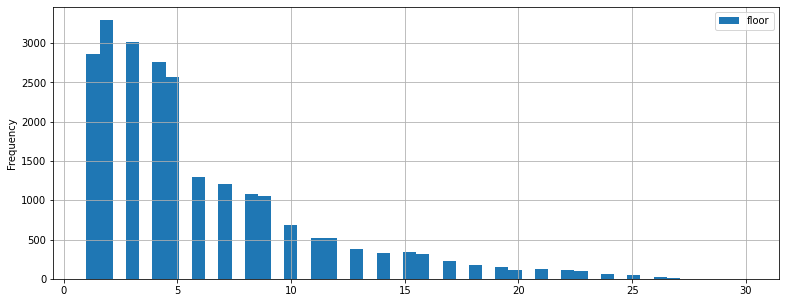

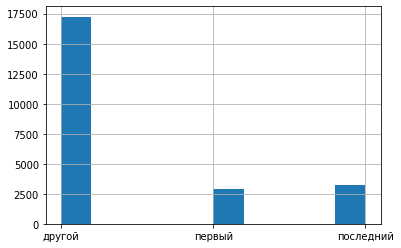

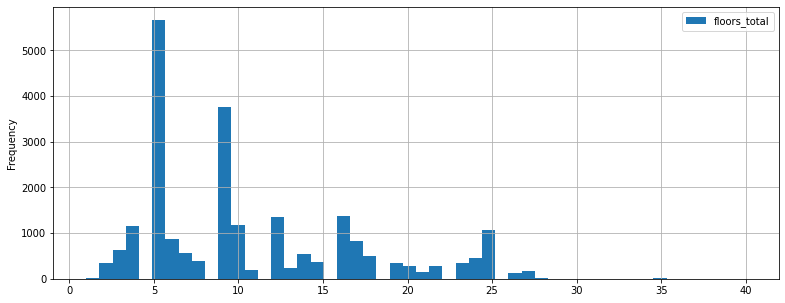

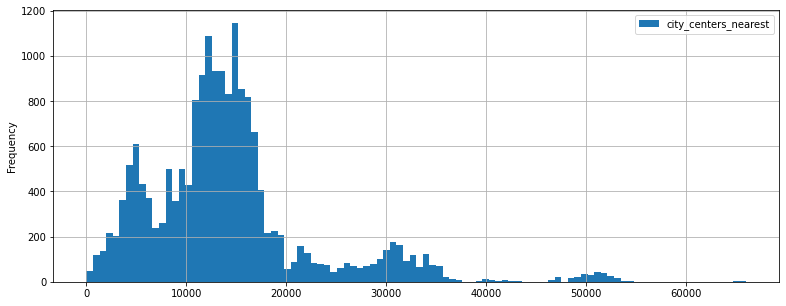

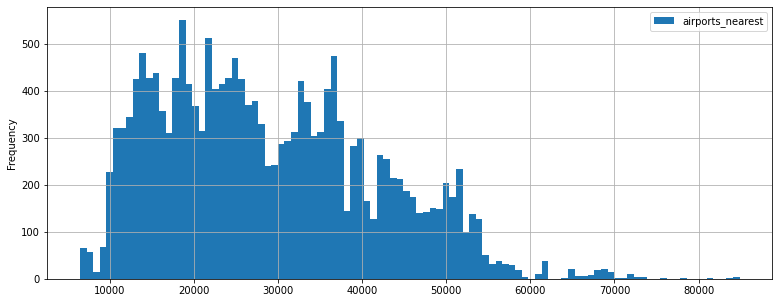

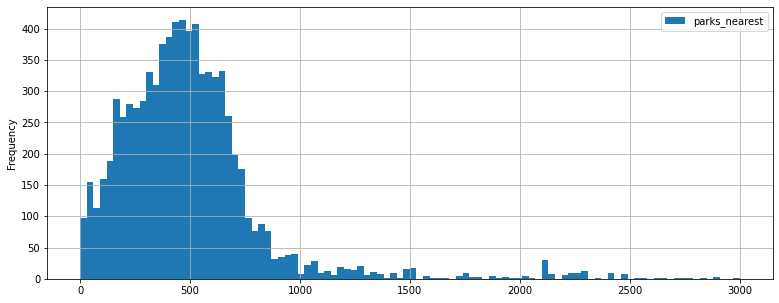

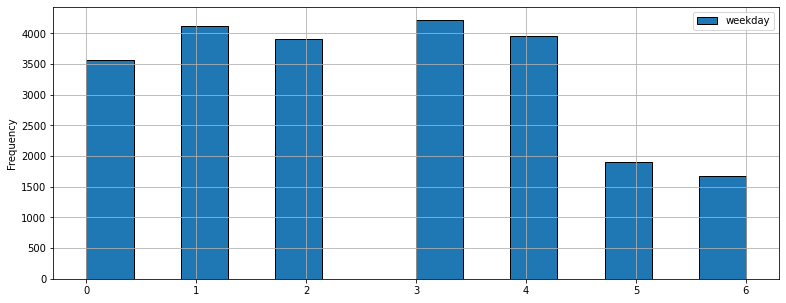

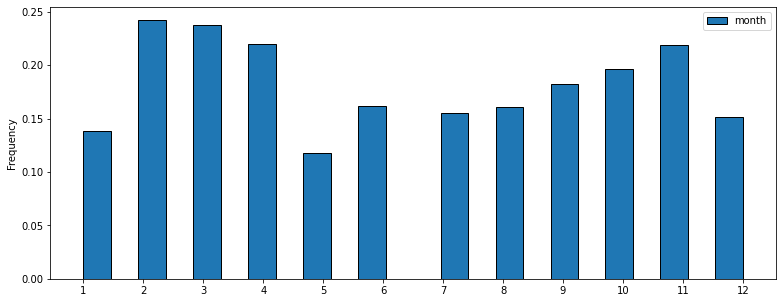

In [63]:
good_data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize = (13, 5), range=(12, 200))

good_data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize = (13, 5), range=(2, 150))

good_data.plot(y='kitchen_area', kind='hist', bins=50, grid=True, figsize = (13, 5), range=(1, 50))

good_data.plot(y='last_price', kind='hist', bins=300, grid=True, figsize = (13, 5), range=(1, 40))

good_data.plot(y='rooms', kind='hist', bins=100, grid=True, figsize = (13, 5))

good_data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize = (13, 5), range=(2.4, 4))

good_data.plot(y='floor', kind='hist', bins=50, grid=True, figsize = (13, 5), range=(1, 30))
plt.show()

good_data['floor_type'].hist()
plt.show()

good_data.plot(y='floors_total', kind='hist', bins=50, grid=True, figsize=(13, 5), range=(1, 40))

good_data.plot(y='city_centers_nearest', kind='hist', bins=100, grid=True, figsize = (13, 5), range=(0, 65968))

good_data.plot(y='airports_nearest', kind='hist', bins=100, grid=True, figsize = (13, 5))

good_data.plot(y='parks_nearest', kind='hist', bins=100, grid=True, figsize = (13, 5), range=(0, 3000))

good_data.plot(y='weekday', kind='hist', bins=14, ec='black', grid=True, figsize = (13, 5))

ax = good_data.plot(y='month', kind='hist', histtype='barstacked', density=True,\
               ec='black', bins=24, range=(1, 12), figsize = (13, 5))
ax.set_xticks(range(1, 13))
ax;

In [64]:
good_data.query('rooms == 0')['studio'].value_counts()

True     137
False     58
Name: studio, dtype: int64

In [65]:
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m,weekday,month,year,city_сenters_nearest_km
count,23348.000000,23348.000000,23348.000000,23348.000000,23348.000000,23264.000000,23348.000000,23348.000000,23348.000000,23348.000000,17923.000000,17945.000000,17946.000000,7933.000000,17946.000000,8960.000000,20253.000000,23348.000000,23348.000000,23348.000000,23348.000000,17945.000000
mean,9.860245,6.278855,58.916457,2.030709,2.702383,10.741833,33.642522,5.919565,10.397987,0.594612,28840.389332,14275.093787,0.605093,492.190218,0.765686,519.611049,180.466104,99.322128,2.569171,6.404403,2017.367312,14.267986
std,5.674458,8.171681,30.252305,0.974709,0.240671,6.598708,18.934340,4.893980,5.768249,0.961636,12674.400241,8588.364444,0.796142,344.015534,0.935648,277.737252,219.520709,47.824921,1.789057,3.492214,1.038760,8.596954
min,0.000000,0.430000,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,9.615385,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.430000,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18522.000000,9425.000000,0.000000,288.000000,0.000000,295.000000,45.000000,76.923077,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26871.000000,13149.000000,0.000000,456.000000,0.000000,503.000000,95.000000,95.062857,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,37406.500000,16318.000000,1.000000,614.000000,1.000000,732.250000,231.000000,114.285714,4.000000,10.000000,2018.000000,16.000000
max,50.000000,401.300000,507.000000,5.000000,10.300000,60.000000,301.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1736.842105,6.000000,12.000000,2019.000000,66.000000


<font color='#8A2BE2'> **Общая площадь** <font/>
    
- медианное значение 52м², среднее - 58.9м², чаще всего выставляют на продажу квартиры площадью 40-69м²,
- есть пик на значениях около 45м² - скорее всего какая-то типовая застройка.

<font color='#8A2BE2'> **Жилая площадь** <font />
- медианное значение 30м², среднее - 33.6м², чаще всего выставляют на продажу квартиры с жилой площадью 19-43м²,
- есть пики на значениях около 18м², 25м², 42м² - скорее всего какая-то типовая застройка.

<font color='#8A2BE2'>**Площадь кухни**<font />
- медианное значение 9м², среднее - 10.4м², чаще всего выставляют на продажу квартиры с площадью кухни 7-12м²,
- значения меньше 5м² почти не встречаются.

<font color='#8A2BE2'>**Цена объекта**<font />
- медианное значение 4.6млн, среднее - 6.2млн, чаще всего выставляют на продажу квартиры стоимостью 3.4-6.7млн,
- стоимость ниже 2млн и выше 20млн - редкость.

**Количество комнат**
- чаще всего продаются квартиры с 1 или 2 комнатами, количество квартир с  3, 4 и 5 комнатами - убывает с возрастанием количества комнат,
- большая часть квартир с нулем комнат - студии.

**Высота потолков**
- медианное значение 2.7м, среднее - 2.7м, высокий пик на значении 2.7м,
- потолки выше 3м - редкость.

**Этаж квартиры**
- чаще всего продают квартиры на 1-8 этажах, самые высоки пики 1-5 этаж - возможно это вклад относительно старых пятиэтажных простроек.

**Тип этажа квартиры («первый», «последний», «другой»)**
- чаще продаются квартиры на "другом" этаже - логично, ведь их всегда больше в зданиях, которые с 4 и более этажами, а многоквартирные дома обычно такие.

**Общее количество этажей в доме**
- большая часть квартир продаваемых квартир надохится в 5 или 9-этажных домах, ожидаемо для России.

**Расстояние до центра города в метрах**
- медианное значение 13149м, среднее - 14279м, чаще всего выставляют на продажу квартиры на расстоянии 9.5-16км от центра,
- очень мало квартир на расстоянии 36-46км, на расстоянии 46-53км - квартир побольше (видимо какие-то активно населенные районы), на большем расскоянии квартир почти не встречается.

**Расстояние до ближайшего аэропорта**
- медианное значение 26871м, среднее - 28840м, чаще всего выставляют на продажу квартиры на расстоянии 13-37км от центра,
- очень мало квартир на расстоянии больше 60км.

<font color='#8A2BE2'>**Расстояние до ближайшего парка**<font />
- медианное значение 456м, среднее - 492м, чаще всего выставляют на продажу на расстоянии 288-614м от парка,
- редки квартиры находятся на расстоянии ≥ 1000м от парков.


<font color='#8A2BE2'>**День и месяц публикации объявления**<font />
- чаще всего квартиры выставляются на продажу в будние дни (лидирует четверг),
- реже всего квартиры на продажу выставляют в декабре, январе и мае - скорее всего это связано с праздниками, летом - объявлений тоже мало (отпуска), с сентября количество объявлений растет (до резкого падения в декабре), больше всего объявлений в феврале, далее - март, апрель, ноябрь.

#### Изучим сроки продажи квартир

Изучим, как быстро продавались квартиры (столбец days_exposition).

In [66]:
good_data['days_exposition'].describe()

count    20253.000000
mean       180.466104
std        219.520709
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<font color='#8A2BE2'>Среднее - 180 дней и медиана - 95 дней.<font />

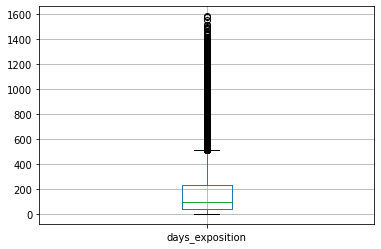

In [67]:
good_data.boxplot('days_exposition');

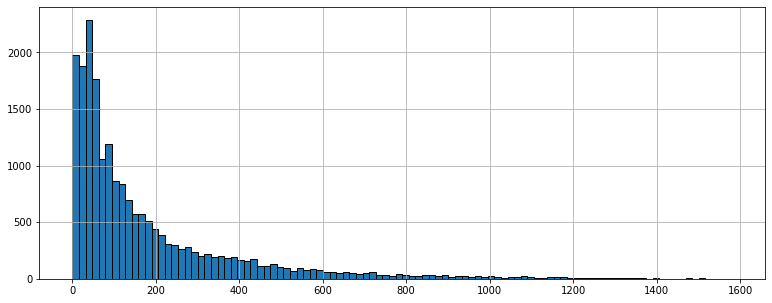

In [68]:
good_data['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black');

Большая часть квартир продается в срок до 100 дней, после 600 дней - выбросы.

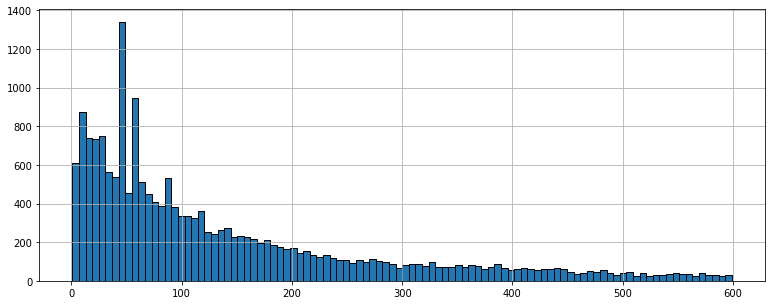

In [69]:
good_data.query('days_exposition < 600')['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black');

На гистограмме видны пики в районе до 100 дней, посмотрим на распределение срока публикации в этом промежутке:

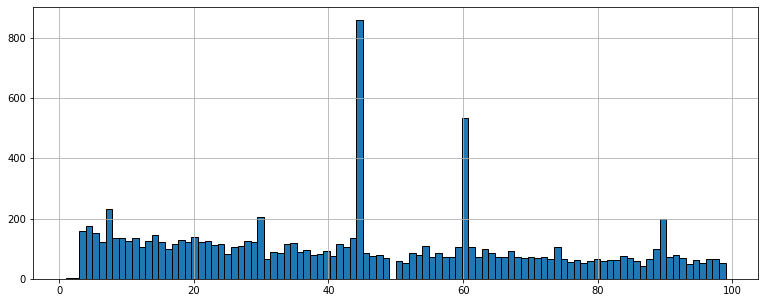

In [70]:
good_data.query('days_exposition < 100')['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black');

Видны пики на 6-8, 30, 45, 60, 90 днях - выглядит не естественно.

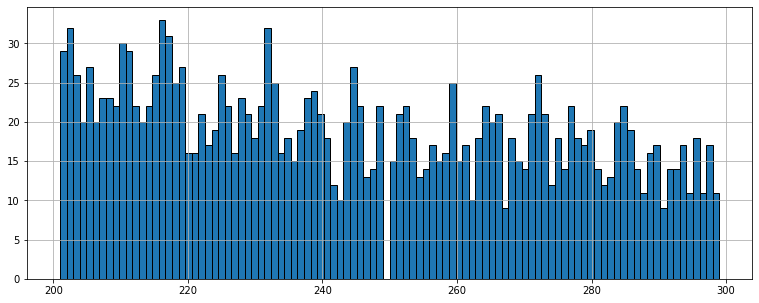

In [71]:
good_data.query('200 < days_exposition < 300')['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black');

На 200-300 день таких явных пиков нет.

Цитата об условиях размещения объявлений для Ленинградской области с Яндекс Справки :
>    Платное объявление — 30 дней. На 31-й день платного размещения включится автопродление. Деньги будут списываться каждые 30 дней из кошелька в кабинете или с привязанной банковской карты. Отключить автопродление нельзя, просто снимите объявление с публикации, если оно больше неактуально.

Скорее всего пики на гистограмме срока публикации на 30, 60, 90 обусловлены снятием платных объявлений (приходит чек на списание средств за публикацию и продавец вспоминает, что объявление уже не актуально, и закрывает его). 

Пик на 6-8 день может быть естественным:
>   Государственная регистрация договора купли-продажи, а точнее, перехода права собственности на недвижимость по нему осуществляется в течение 7 дней в случае подачи заявления непосредственно в территориальное подразделение Росреестра.

Почему есть пик на 45 день - непонятно. Нужно узнать у разработчиков сервиса.

Бесплатное объявление на продажу квартир и комнат — 365 дней.

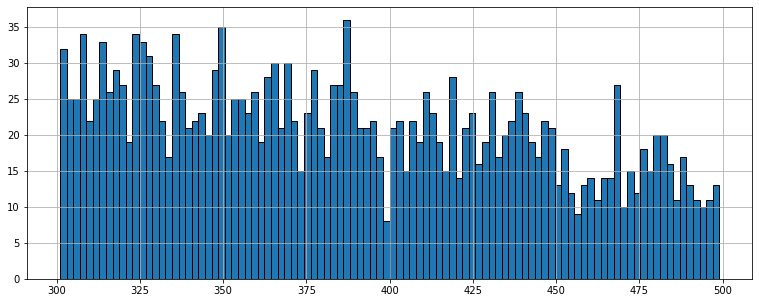

In [72]:
good_data.query('300 < days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black');

На 365 день нет выраженного пика, возможно потому что большая часть квартир продается раньше истечения этого срока.

In [73]:
print('Доля данных без продаж в пиковые дни - {0:.1%}'.format((good_data.query('days_exposition != 30 \
    and days_exposition != 45 and days_exposition != 60 and \
    days_exposition != 90').count()/good_data.count())['last_price']))

Доля данных без продаж в пиковые дни - 92.3%


В идеале - получить бы данные о том, какие из объявлений были платными и на основании этого удалить данные о платных объявлениях на пиковых значениях. Но в данном исследовании это не осуществимо, поэтому просто очистим данные от продаж на 30, 45, 60 и 90 дни (останется 92.3% данных).

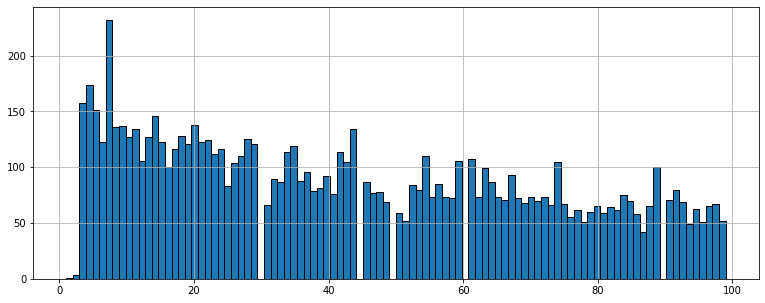

In [74]:
good_data = good_data.query('days_exposition != 30 and days_exposition != 45 \
    and days_exposition != 60 and days_exposition != 90').copy()

good_data.query('days_exposition < 100')['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black');

count    18456.000000
mean       192.908268
std        226.079370
min          1.000000
25%         43.000000
50%        112.000000
75%        254.000000
max       1580.000000
Name: days_exposition, dtype: float64

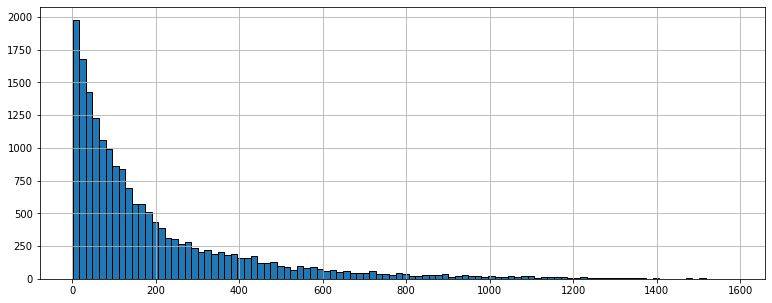

In [75]:
good_data['days_exposition'].hist(bins=100, figsize=(13, 5), ec='black')
good_data['days_exposition'].describe()

<font color='#8A2BE2'>Среднее и медиана сдвинулись: среднее 192 дня (вместо 180 дней), медиана - 112 дней (вместо 95 дней). Распределение стало более "гладким".<font />

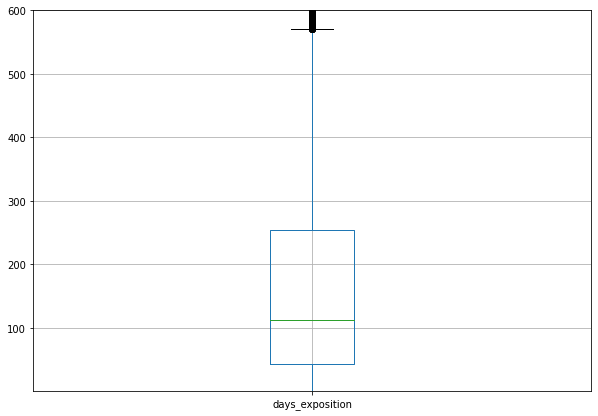

In [76]:
good_data.boxplot('days_exposition', figsize=(10, 7))
plt.ylim(1, 600);

<font color='#8A2BE2'>Обычно продажи осуществляются в срок от 43 до 254 дней, быстрыми продажами можем считать те, кторые проведены ранее чем за 43 дня, очень долгие > 600 дней.<font />

In [77]:
print('Доля очищенных данных от начальной величины составляет: {0:.2%}'.format(good_data.shape[0]/data.shape[0]))

Доля очищенных данных от начальной величины составляет: 90.94%


<font color='#8A2BE2'>Меньше 10%!<font />

#### Определение влияния факторов на общую (полную) стоимость объекта

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).


Коэффициент корреляции Пирсона: 0.6796091989918066


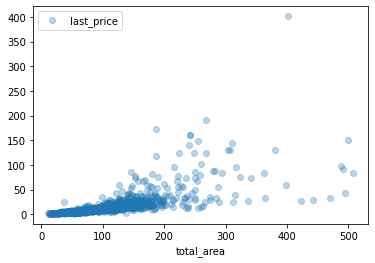

In [78]:
good_data.pivot_table(index='total_area', values='last_price').plot(style='o', alpha=0.3)

print('Коэффициент корреляции Пирсона:', good_data['total_area'].corr(good_data['last_price']))

Коэффициент корреляции Пирсона: 0.68 - положительная средняя корреляция (с ростом площади растёт стоимость квартиры), что подтверждается и диаграммой рассеяния. Однако зависомость не абсолютна, при площади квартиры ≥ 100м2 можно наблюдать увеличение разброса цен при близких значениях площадей. Здесь вероятно уже большую роль играют сторонние факторы - район, элитность ЖК, отделка и др.

Коэффициент корреляции Пирсона: 0.5993723772061318


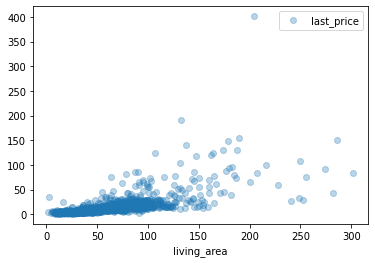

In [79]:
good_data.pivot_table(index='living_area', values='last_price').plot(style='o', alpha=0.3)

print('Коэффициент корреляции Пирсона:', good_data['living_area'].corr(good_data['last_price']))

Коэффициент корреляции Пирсона: 0.58 - значение несколько меньше, чем для общей площади (корреляция ближе к слабой):
- жилая площадь для двух одинаковых по площади квартир может быть разной (в зависимости от планировки),
- жилая площадь может быть меньше из-за дополнительного санузла, но стоить такая квартира будет дороже,
- так же будут влиять район, элитность ЖК, отделка и др,

т.е. здесь на уменьшение корреляции будут еще больше влиять сторонние факторы. И скорее корреляция в большей мере обусловлена зависимостью между общей площадью и жилой зоной.

Коэффициент корреляции Пирсона: 0.5374329481175573


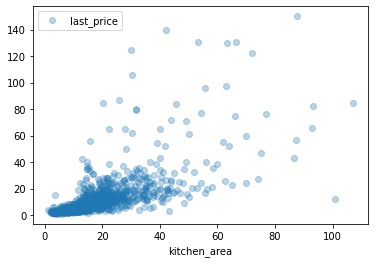

In [80]:
good_data.pivot_table(index='kitchen_area', values='last_price').plot(style='o', alpha=0.3)

print('Коэффициент корреляции Пирсона:', good_data['kitchen_area'].corr(good_data['last_price']))

Коэффициент корреляции Пирсона: 0.5 - значение еще немного уменьшилось (слабая корреляция):
- так же влияют сторонние факторы,
- плюс можем наблюдать как при увеличении площади кухни больше 10м² увеличивается разброс стоимости квартир - площадь кухонь в панельных домах типовой серии П-47 – от 8 до 9 квадратных метров, большая площадь у "не типовых" домов, т.е. больше вариативности в типах жилья (евро-квартиры, бизнес-, премиальный сегмент).

Коэффициент корреляции Пирсона: 0.35363171359380935


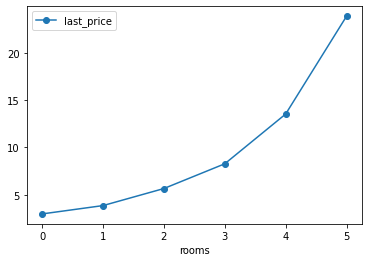

In [81]:
good_data.pivot_table(index='rooms', values='last_price').plot(style='o-')

print('Коэффициент корреляции Пирсона:', good_data['rooms'].corr(good_data['last_price']))

График показывает зависомость (чем больше комнат, тем выше цена), однако коэффициент корреляции Пирсона: 0.36 - слабая корреляция, скорее всего это вызванно наличием квартир с небольшим количеством комнат, но высокой стоимостью (очень большая площадь комнат, квартиры в дорогих районах, премиальное жилье).

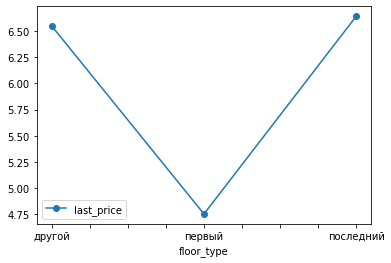

In [82]:
good_data.pivot_table(index='floor_type', values='last_price').plot(style='o-');

- Ожидаемо - квартиры на первом этаже дешевле (люди не хотят, чтобы к ним в окна заглядывали прохожие), 
- квартиры на последнем этаже оказались дороже (не очень сильно), чем квартиры на других этажах, что странно, но скорее это обусловленно большой разницей в численности этих выборок - квартир на других этажах гораздо больше, чем на последнем, а значит и вариативность цен будет больше.

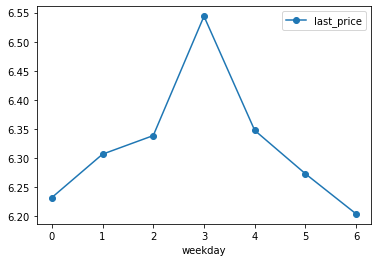

In [83]:
good_data.pivot_table(index='weekday', values='last_price').plot(style='o-');

Самая высокая стоимость квартир в четверг, самая низкая в понедельник и воскресенье, возможно это связано с работой риэлторов, которые публикуют квартиры в середине недели, чтобы назначить просмотры на выходные дни.

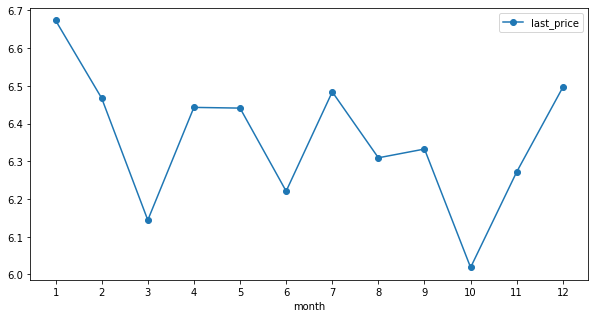

In [84]:
ax = good_data.pivot_table(index='month', values='last_price').plot(style='o-', figsize=(10, 5))
ax.set_xticks(range(1, 13))
ax;

- Наибольшая стоимость на квартиры в январе и декабре, при том, что количество предложений в эти месяцы минимальное, возможно отсутствие конкуренции на рынке в данные месяцы обуславливает подъем цен,
- наименьшая стоимость в октябре и марте - предложений довольно много (и возможно из-за этого цена ниже), но все же это не самые богатые на количество объявлений месяцы -  непонятно, чем обусловлено снижение средней стоимости.

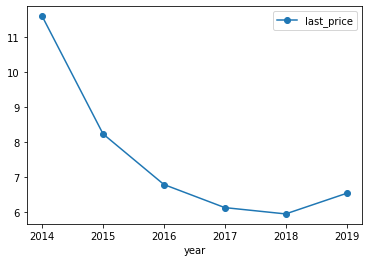

In [85]:
good_data.pivot_table(index='year', values='last_price').plot(style='o-');

В 2014 году цены на квартиры были самыми высокими в нашей выборке, далее до 2018 года стоимость на квартиры снижалась, это обусловлено экономической ситуацией:

> На протяжении 2014 года внешние факторы успели дважды вызвать ажиотаж вокруг недвижимости, чего не было никогда ранее. Первая волна ажиотажа пришлась на начало 2014 года и длилась с января по середину апреля. Такова была реакция людей на ситуацию с присоединением Крыма и ухудшение отношений с западным миром. Тогда в равной мере повысилась активность как инвестиционных покупателей, так и людей, поспешивших побыстрее купить квартиру для жизни и решить квартирный вопрос по принципу «пока не стало хуже».

> Вторая волна ажиотажа на рынке недвижимости стала зарождаться в ноябре и достигла своего апогея в декабре 2014 года на фоне беспрецедентного обвала рубля. Она оказалась даже более сильной и более эмоциональной, чем первая, но, видимо, она станет и более краткосрочной. По сути, рынок недвижимости захлестнула та же паника, что и все другие товарные рынки, и большинством людей двигало желание купить хоть что-нибудь, чтобы спасти деньги.

> Из [обзора рынка недвижимости по итогам 2014 года](https://www.irn.ru/news/96558.html)

С 2018 по 2019 год цена стала увеличиваться.

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [86]:
locality_price_pivot_table = good_data.pivot_table(index='locality_name',\
                                              values = 'price_square_m', aggfunc=['count', 'mean'])
locality_price_pivot_table.columns = ['count', 'mean_price_square_m']
locality_price_pivot_table = locality_price_pivot_table.sort_values('count', ascending=False).head(10)
locality_price_pivot_table = locality_price_pivot_table.sort_values('mean_price_square_m', ascending=False)
locality_price_pivot_table

,count,mean_price_square_m
locality_name,,
Санкт-Петербург,14473,114.490216
Пушкин,347,103.671599
Кудрово,425,95.147104
Парголово,286,90.727635
Мурино,551,85.905388
Шушары,396,78.913644
Колпино,305,75.620794
Всеволожск,366,68.706246
Гатчина,282,68.361745


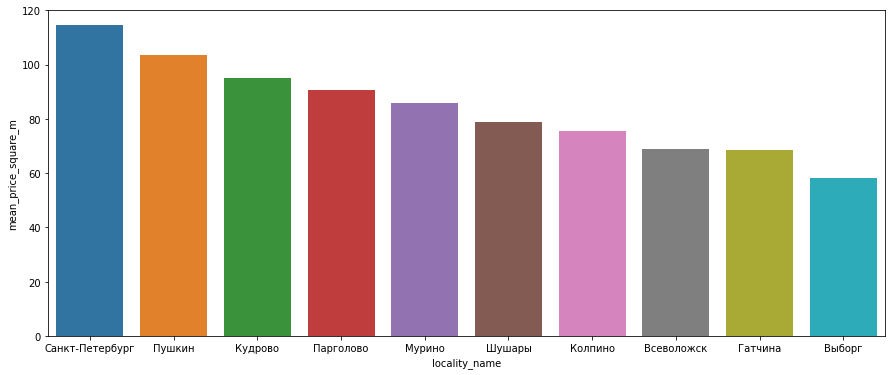

In [87]:
plt.figure(figsize=(15, 6))
sns.barplot(x=locality_price_pivot_table.index, y="mean_price_square_m",\
            data=locality_price_pivot_table);

In [88]:
print('Самая высокая стоимость за квадратный метр в',\
      locality_price_pivot_table.query('mean_price_square_m == mean_price_square_m.max()').index[0])
print('Самая низкая стоимость за квадратный метр в',\
      locality_price_pivot_table.query('mean_price_square_m == mean_price_square_m.min()').index[0])

Самая высокая стоимость за квадратный метр в Санкт-Петербург
Самая низкая стоимость за квадратный метр в Выборг


#### Зависимость стоимости объектов  от расстояния до центра города

Вычислим среднюю цену квадратного метра для каждого километра удаленности от центра Санкт-Петербурга.

In [89]:
flat_spb = good_data.query('locality_name == "Санкт-Петербург"')
flat_spb_pivot_table = flat_spb.pivot_table(index='city_сenters_nearest_km', values='price_square_m')
flat_spb_pivot_table

,price_square_m
city_сenters_nearest_km,
0.0,254.925831
1.0,179.477156
2.0,158.166320
3.0,122.655951
4.0,130.690639
5.0,139.597551
6.0,148.996388
7.0,156.681265
8.0,125.229946


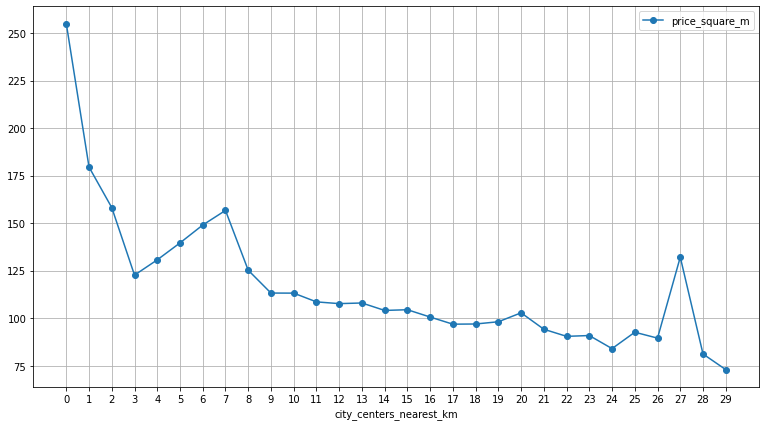

In [90]:
ax = flat_spb_pivot_table.plot(style='o-', figsize=(13, 7), grid=True)
ax.set_xticks(range(0, 30))
ax;

- Самые дорогие квадраты жилплощади в Питере в радиусе 2км от цента,
- на расстоянии 3-7км от центра стоимость квадратных метров увеличивается (возможно это какие-то элитные, удобные районы с новой застройкой),
- по мере удаления от центра цена снижается, но есть пик на 27км (без адресов не узнать, что это за район, но видимо он чем-то положительным выделяется).

### Общий вывод

Обработан архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах:
- заполнены пропущенные значения там, где это возможно, 
- заменены типы данных,
- изучены и устранены аномальные значения,
- создан очищенный датафрейм с новыми столбцами (цена квадратного метра, дни недели, месяцы и годы размещения объявлений, категории по этажам квартир, расстояние от центра в км).

**Срок продажи квартиры**

- В сроках продажи квартир выявлены подозрительные пики на 30, 45, 60 и 90 дни, предположительно это связано с особенностями размещения платных объявлений на сервисе, данные по этим объявлениям не использовались в дальнейшем анализе.
- <font color='#8A2BE2'>Обычно продажи осуществляются в срок от 43 до 254 дней, быстрыми продажами можем считать те, кторые проведены ранее чем за 43 дня, очень долгие > 600 дней.<font />

**Факторы, влияющие на стоимость**

- Большее влияние не стоимость квартиры оказывает общая площадь (чем больше площадь, тем выше стоимость), площади жилой зоны и кухни вносят меньший вклад - увеличивается влияние сторонних факторов.
- Квартиры, расположенные на первом этаже, дешевле остальных.
- В четверг появляются объявления в среднем с более высокой стоимостью.
- <font color='#8A2BE2'>За большую стоимость выставляются квартиры в декабре и январе, что может быть связано с низкой конкуренцией на рынке, меньшая стоимость - в октябре и марте.<font />
- Из-за кризиса 2014 года стоимость квартир была высокой в 2014 году и после начала снижаться, повышение цен началось с 2018 года.

**Стоимость квадратного метра в 10 наиболее населённых пунктах**

- <font color='#8A2BE2'>Наиболее населенные пункты: Санкт-Петербург, Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Всеволожск, Гатчина, Выборг.
- Самая высокая стоимость за квадратный метр в Санкт-Петербурге - 114 т.р.
- Самая низкая стоимость за квадратный метр в Выборге - 58 т.р.<font />

**Зависимость стоимости объектов от расстояния до центра Санкт-Петербурга**

- Самые дорогие квадраты жилплощади в Питере в радиусе 2км от цента,
- на расстоянии 3-7км от центра стоимость квадратных метров увеличивается,
- по мере удаления от центра цена снижается, но есть пик на 27км.